# <center> A Complete Guide to Support Vector Machine </center>

## Table of Contents

<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is Support Vector Machine?
    - 1.2 How does Support Vector Machine work?
    
        
- [2. How to find the best decision boundary?](#2)
    - 2.1 Hard-Margin SVM
    - 2.2 Soft-Margin SVM
    - 2.3 The Kernel Trick
    - 2.4 Multiclass Classification
    

- [3. Example: Handwritten Digits Recognition](#3)
    - 3.1 Visualization
    - 3.2 Tuning parameters 
    - 3.3 Making predictions

<a id="1"></a>

# <center>Introduction</center>

## What is Support Vector Machine?

**`Support Vector Machine`** (SVM) is a popular machine learning method that can be used both for solving **classification** and **regression** problems.

In this notebook, we focus on the classification part. **Support Vector Machine** achieves classification by spliting the data points with a **hyperplane** (also called a decision boundary). For example, in cases where there are only 2 input variables (**2-dimensional**), the **`decision boundary`** is simply a straight line. In **3-dimensional** cases, the decision boundary becomes a plane:

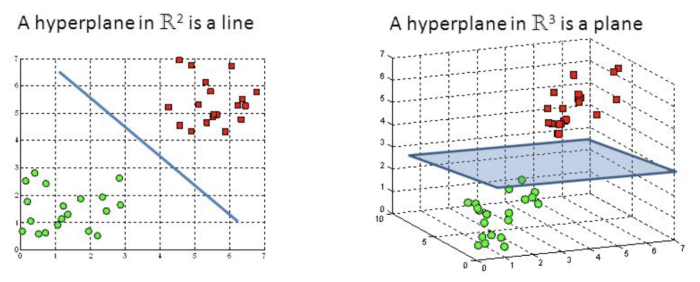

Image Source: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47|

## How does Support Vector Machine work?

As demonstarted above, the SVM places a **straight line** to split the data points with different classes. However, there are **many possible lines** that can be used as the decision boundary:

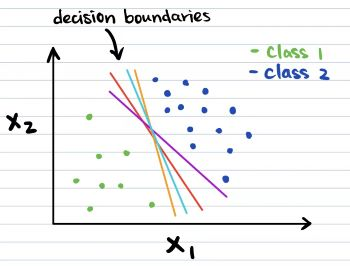

How does the SVM find the best decision boundary? We can look at this problem from 2 angles:

#### **`Robust to Noise`**

Image the input variables are corrupted by noise (measurement errors), the SVM will choose the line that is the most robust to the noise. 

In the diagram below, both the red and blue line will **easily misclassify** the samples when the **measurement errors (grey area) gets larger**. The black line, on the other hand, is **robust to changes in measurement errors** while maintaining a good classification result.

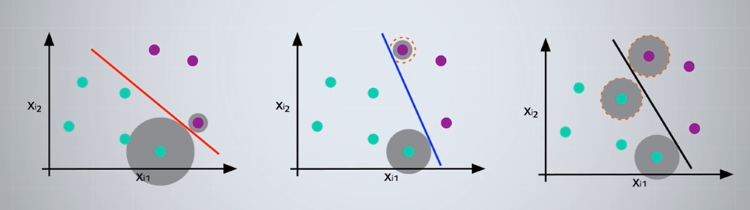

#### **`Maximizes the Margin`**

As demonstrated in the following diagram, the SVM will choose the line that seperates the data with the **largest classification margin** (grey bar).

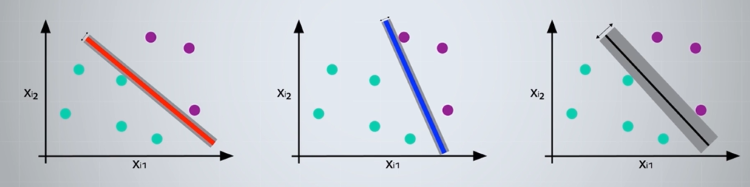

Looking at the above 2 diagrams, we can notice that the decision boundary is chosen based on a **small number of samples**. These are the data points are the **closest to the decision boundary**. Since they support our decision making, they are called the **support vectors**. Hence, the name of the model: **support vector machine**.

<a id="2"></a>

# <center>How to find the best decision boundary?</center>

## Hard-Margin SVM

In the demonstrations shown above, the SVM splits the data points with a decision boundary that **strickly exclude any points from the margin**. Therefore, this type of SVM is called the **`hard-margin SVM`**.

There are 2 biggest **drawbacks of hard-margin SVM**:

1. It cannot handle **outliers**
2. It cannot deal with **non-linear relationships**

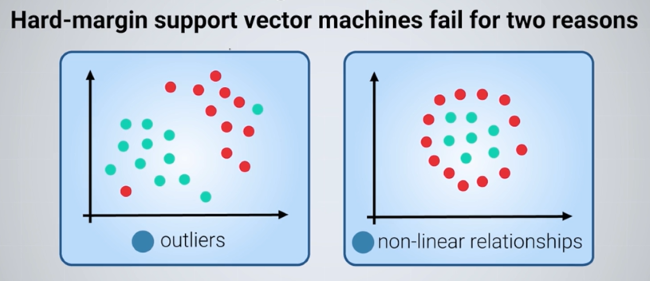

Luckily, there are solutions to these two problems: 

1. The **soft-margin SVM** for outliers
2. The **kernel trick** for non-linear relationships

## Soft-Margin SVM

When outliers exists, the data points sometimes cannot be split linearly adn therefore a **hard-margin SVM** will not work.

A **`soft-margin SVM`** allows some samples to be within the decision margin. By doing so, a **better decision boundary** can be computed (even though there is a few data points on the wrong side of the boundary). For example:

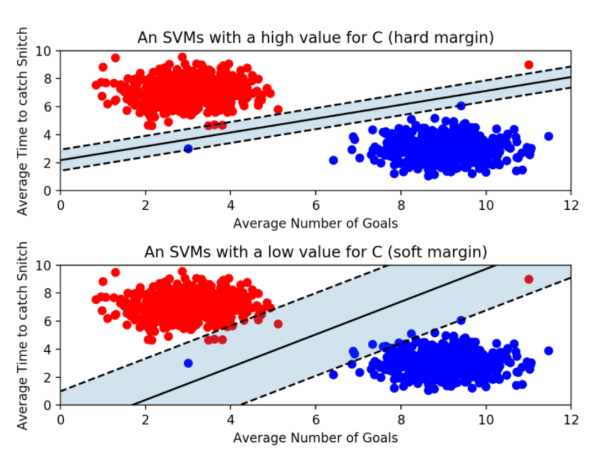

## The Kernel Trick

The **`kernel trick`** is a technique to deal with **non-linear relationships** between input variables and the output. That is, when the data points **cannot be seperated linearly**.

The **kernel trick** transforms the data points by **lifting them to a higher dimension** so that they become linearly seperable. For example, the kernel trick can introduce an additional **auxiliary variables** which makes an originally 2-dimensional data point to 3-dimensional:

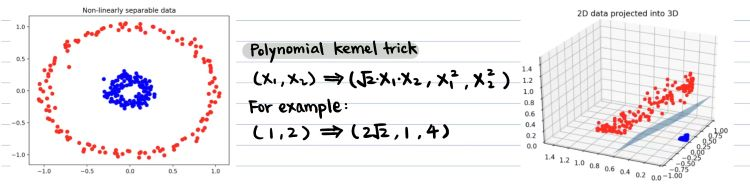

As demonstrated above, the **lifted** data points can now be linear seperated with a **plane**. There are more **lifting methods**:

1. **`Polynomial`**: introduces auxiliary variables that are multiplications and powers of the input variables
2. **`Gaussian Radial Basis Function (rbf)`**: introduces infinitely many new variables
3. **Sigmoid**
4. **Hyperbolic Tangent**

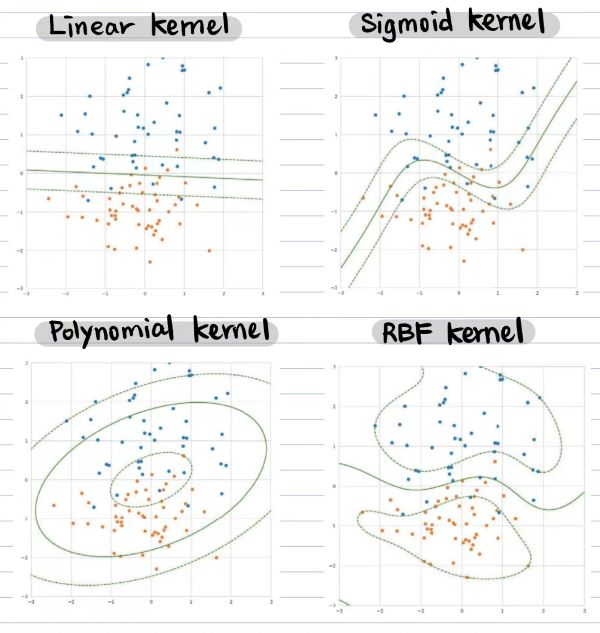

## Multiclass Classification

In all the diagrams above, we only demonstarted how SVM works in **binary classifications**. Can SVM be used in **multiclass classifications**?

There are 2 solutions:

**`One-vs-All Classification`**: construct 1 binary SVM for each output classes

**`One-vs-One Classification`**: construct 1 binary SVM for each **pair of the possible outputs** (in total nC2 SVMs for n output classes)

For both methods, we make predictions using all the SVMs and the final outcome will be the **most frequent** outcome from the SVMs.

<a id="3"></a>

# <center>Example: Handwritten Digits Recognition</center>

Support Vector Machine is one of the strongest methods in solving **`handwriting optical character recognition`** problems.

This is because the kernel trick allows SVM to learn the **complicated realtionships** not just between individual pixels of an imgae but also **between larger conglomerations of pixels**.

Therefore, as an example here we use SVM to perform handwritten digits recognition. The dataset comes from Kaggle: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

### Import Data

In [2]:
df_train = pd.read_csv('../input/mnist-in-csv/mnist_train.csv')
df_test = pd.read_csv('../input/mnist-in-csv/mnist_test.csv')

### Visualize the Target Variable

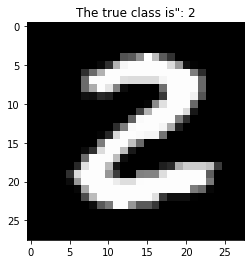

In [12]:
#have a look at an example of the output variable

instance = 25
plt.imshow(np.reshape(np.array(df_train.iloc[instance,1:]), (-1,28)), cmap = 'gray')
plt.title('The true class is": %i' %df_train.iloc[instance, 0])
plt.show()

### Split Data

In [4]:
X_train = df_train[df_train.columns[1:]]
y_train = df_train['label'] 
X_test = df_test[df_test.columns[1:]] 
y_test = df_test['label']

### Data Preparation

In [5]:
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SVM: One-vs-Rest Classification

**Parameters** of the model provided by scikit-learn:

1. **C**: regularization strength, C=float, default=1.0, a high value means hard-margin and a low value means soft-margin
2. **kernel**: the kernel method, kernel={‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
3. **degree**: use only if polynomial kernel is applied
4. **gamma**: kernel coefficient for kernel = ‘rbf’, ‘poly’ and ‘sigmoid’, similar to C

Parameter tuning for SVM is time consuming which we will therefore not implement in this notebook.

In [6]:
#train a SVM with the RBF kernel

rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

SVC()

### Make Predictions

In [7]:
y_pred = rbf_svm.predict(X_test)

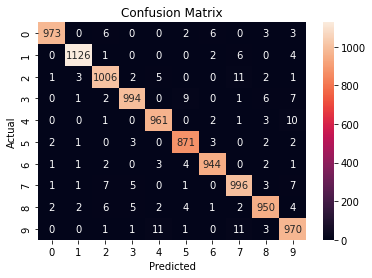

In [8]:
#compute the confusion matrix

cm = confusion_matrix(y_pred, y_test)
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
#the accuracy score of the model

accuracy_score(y_pred, y_test)

0.9791

### Visualize the Results

0


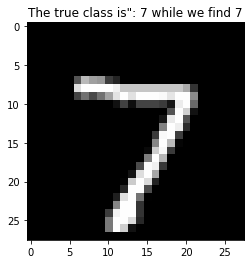

In [10]:
#have a look at a case that the model correctly classified

for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        instance = i
        print(i)
        break

plt.imshow(np.reshape(np.array(df_test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (y_test[instance], y_pred[instance]))
plt.show()

8


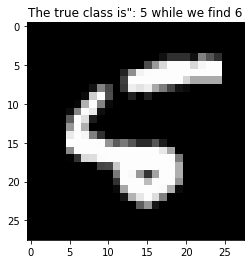

In [11]:
#have a look at a case that the model misclassified

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        instance = i
        print(i)
        break
         
plt.imshow(np.reshape(np.array(df_test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (y_test[instance], y_pred[instance]))
plt.show()